# **Assignment 1**
1- Load two common datasets

2- Use any needed pre-processing function to analyze dataset

3- Use LeNet-5 to complete the process of classification

4- Print LeNet-5 architecture

5- Print number of Trainable parameters in each layer

6- Print confusion matrix relative to testing samples

7- Print precision, recall, f1_score

8- Comment on your results

## Importing Libraries

In [1]:
import numpy as np
import seaborn as sns
import tensorflow as tf
from keras import datasets, layers, models, Sequential
from keras.layers import Dense, Activation, Dropout, Input, Conv2D, MaxPooling2D, Flatten, ReLU, AveragePooling2D
from keras.losses import SparseCategoricalCrossentropy
import matplotlib.pyplot as plt
from tensorflow.keras import utils
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

## 1. Load data

CIFAR-10: The CIFAR datasets contain 32x32 color images (CIFAR-10 has 10 classes).

In [2]:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

In [3]:
x_train

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

In [4]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [5]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

## Normalize pixel values to be between 0 and 1

In [6]:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [7]:
x_train

array([[[[0.23137255, 0.24313726, 0.24705882],
         [0.16862746, 0.18039216, 0.1764706 ],
         [0.19607843, 0.1882353 , 0.16862746],
         ...,
         [0.61960787, 0.5176471 , 0.42352942],
         [0.59607846, 0.49019608, 0.4       ],
         [0.5803922 , 0.4862745 , 0.40392157]],

        [[0.0627451 , 0.07843138, 0.07843138],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509805, 0.21568628],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117648, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215687, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941177, 0.19607843],
         [0.47058824, 0.32941177, 0.19607843],
         [0.42745098, 0.28627452, 0.16470589]],

        ...,

        [[0.8156863 , 0.6666667 , 0.3764706 ],
         [0.7882353 , 0.6       , 0.13333334]

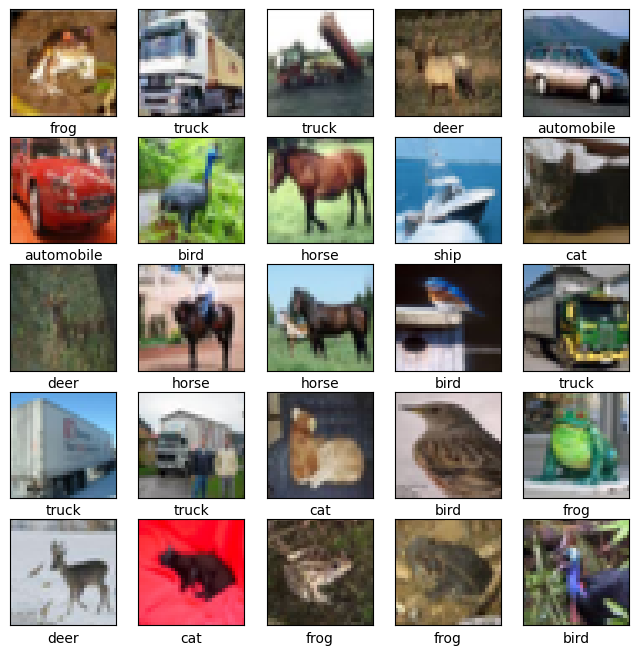

In [8]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(8,8))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i][0]])
plt.show()

In [9]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

### Converting Cifar10 dataset labels vector to categorical data matrix of binary values (either ‘1’ or ‘0’). It has number of rows equal to the length of the input vector and number of columns equal to the number of classes.

In [10]:
y_train = utils.to_categorical(y_train)
y_test = utils.to_categorical(y_test)

y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [11]:
print("Train Images Shape: ", x_train.shape)
print("Test Images Shape:  ", x_test.shape)
print("Train Labels Shape: ", y_train.shape)
print("Test Labels Shape:  ", y_test.shape)

Train Images Shape:  (50000, 32, 32, 3)
Test Images Shape:   (10000, 32, 32, 3)
Train Labels Shape:  (50000, 10)
Test Labels Shape:   (10000, 10)


## LeNet-5 Model

In [33]:
model1 = Sequential()

# First Convolutional Layer
# Input = (32, 32, 3)
# Output = [(32 + 0 - 5) / 1] + 1 = (28, 28, 6)
model1.add(Conv2D(filters=6, kernel_size=(5,5), activation='relu', input_shape=(32, 32, 3)))

# Input = (28, 28, 6)
# Output = [(28 + 0 - 2) / 2] + 1 = (14, 14, 6)
model1.add(AveragePooling2D(pool_size=(2, 2)))

# Second Convolutional Layer
# Input = (14, 14, 6)
# Output = [(14 + 0 - 5) / 1] + 1 = (10, 10, 16)
model1.add(Conv2D(filters=16, kernel_size=(5,5), activation='relu'))

# Input = (10, 10, 16)
# Output = [(10 + 0 - 2) / 2] + 1 = (5, 5, 16)
model1.add(AveragePooling2D(pool_size=(2, 2)))

# Input = (5, 5, 16)
# Output = 5 * 5 * 16 = 400
model1.add(Flatten())                         # Input Layer
model1.add(Dense(120, activation='relu'))     # Hidden Layer (Fully Connected Layer 1)
model1.add(Dense(84, activation='relu'))      # Hidden Layer (Fully Connected Layer 2)
model1.add(Dense(10, activation='softmax'))   # Output Layer

## LeNet-5 architecture, number of trainable parameters in each layer

In [34]:
model1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 28, 28, 6)         456       
                                                                 
 average_pooling2d_4 (Avera  (None, 14, 14, 6)         0         
 gePooling2D)                                                    
                                                                 
 conv2d_5 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_5 (Avera  (None, 5, 5, 16)          0         
 gePooling2D)                                                    
                                                                 
 flatten_2 (Flatten)         (None, 400)               0         
                                                                 
 dense_5 (Dense)             (None, 120)              

## Compile the model

In [35]:
model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

## Train Model

In [36]:
history = model1.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)

Epoch 1/10
1563/1563 [==============================] - 101s 31ms/step - loss: 1.6557 - accuracy: 0.3972 - val_loss: 1.4528 - val_accuracy: 0.4704
Epoch 2/10
1563/1563 [==============================] - 40s 25ms/step - loss: 1.3933 - accuracy: 0.4976 - val_loss: 1.3838 - val_accuracy: 0.4972
Epoch 3/10
1563/1563 [==============================] - 40s 25ms/step - loss: 1.2841 - accuracy: 0.5407 - val_loss: 1.2995 - val_accuracy: 0.5334
Epoch 4/10
1563/1563 [==============================] - 40s 26ms/step - loss: 1.2140 - accuracy: 0.5664 - val_loss: 1.2493 - val_accuracy: 0.5545
Epoch 5/10
1563/1563 [==============================] - 40s 25ms/step - loss: 1.1498 - accuracy: 0.5895 - val_loss: 1.1874 - val_accuracy: 0.5714
Epoch 6/10
1563/1563 [==============================] - 40s 25ms/step - loss: 1.0991 - accuracy: 0.6082 - val_loss: 1.1777 - val_accuracy: 0.5740
Epoch 7/10
1563/1563 [==============================] - 42s 27ms/step - loss: 1.0569 - accuracy: 0.6255 - val_loss: 1.1316 

## Make Predictions

In [37]:
model1_perdict = model1.predict(x_test)

model1_perdict = [np.argmax(arr) for arr in model1_perdict]
print(np.array(model1_perdict))

313/313 [==============================] - 3s 9ms/step
[3 8 8 ... 5 4 7]


In [38]:
ytest = [np.argmax(arr) for arr in y_test]
print(np.array(ytest))

[3 8 8 ... 5 1 7]


## Evaluate Model

In [39]:
model1.evaluate(x_test, y_test)

313/313 [==============================] - 3s 10ms/step - loss: 1.1735 - accuracy: 0.5973


[1.1735427379608154, 0.5972999930381775]

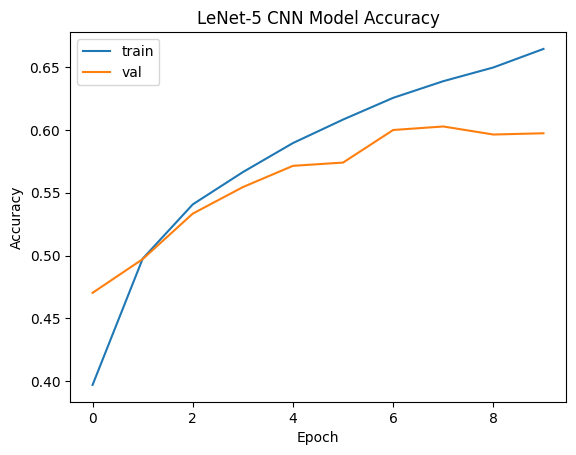

In [40]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('LeNet-5 CNN Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

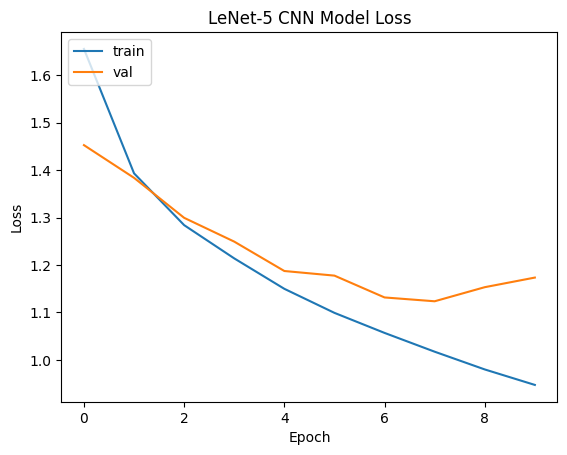

In [41]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('LeNet-5 CNN Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [42]:
print('Accuracy Score =',round(np.max(history.history['val_accuracy']) * 100, 2) , '%')

Accuracy Score = 60.27 %


## Confusion Matrix

In [43]:
cm = confusion_matrix(ytest, model1_perdict)
cm

array([[706,  21,  64,  22,  29,   5,  25,   9,  86,  33],
       [ 54, 702,   8,  10,  11,   8,  44,  14,  54,  95],
       [ 68,   7, 511,  57,  96,  59, 140,  33,  18,  11],
       [ 16,  15,  93, 329,  91, 140, 243,  40,  13,  20],
       [ 34,   7, 127,  52, 514,  25, 137,  82,  18,   4],
       [ 10,   2, 100, 199,  72, 403, 137,  63,   9,   5],
       [  7,   7,  48,  38,  40,  12, 825,  12,   8,   3],
       [ 20,   3,  48,  48,  77,  85,  46, 651,   3,  19],
       [117,  44,  27,  17,  20,   7,  13,   5, 724,  26],
       [ 66, 134,  13,  30,  13,  12,  45,  28,  51, 608]])

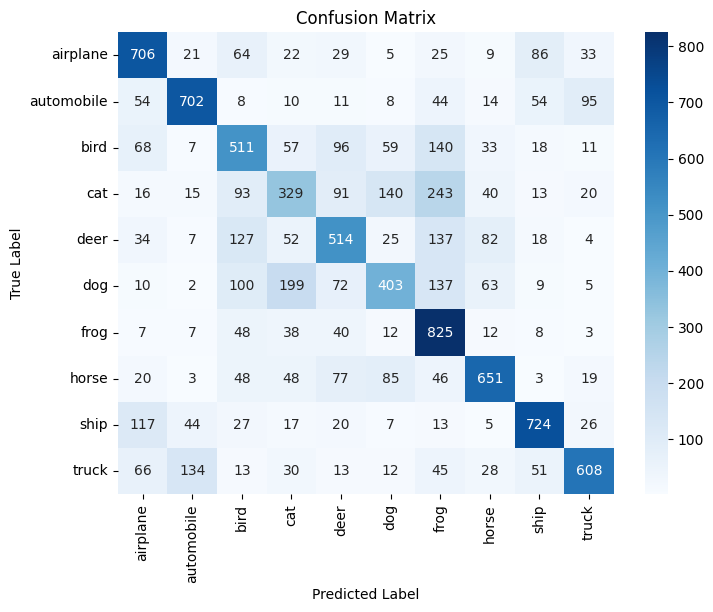

In [44]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

## Precision, recall, f1-score

In [45]:
print(classification_report(ytest, model1_perdict))

              precision    recall  f1-score   support

           0       0.64      0.71      0.67      1000
           1       0.75      0.70      0.72      1000
           2       0.49      0.51      0.50      1000
           3       0.41      0.33      0.37      1000
           4       0.53      0.51      0.52      1000
           5       0.53      0.40      0.46      1000
           6       0.50      0.82      0.62      1000
           7       0.69      0.65      0.67      1000
           8       0.74      0.72      0.73      1000
           9       0.74      0.61      0.67      1000

    accuracy                           0.60     10000
   macro avg       0.60      0.60      0.59     10000
weighted avg       0.60      0.60      0.59     10000



# **Second Dataset**

## 1. Load data

MNIST: The MNIST dataset is a classic choice for digit recognition. It consists of 28x28 grayscale images of handwritten digits (0-9).

In [46]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

In [47]:
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


## 2. Pre-processing

In [49]:
train_labels = utils.to_categorical(train_labels)
test_labels = utils.to_categorical(test_labels)

train_labels

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

## 3. LeNet-5 Architecture

In [53]:
model2 = Sequential()

# First Convolutional Layer
# Input = (28, 28, 1)
# Output = [(28 + 0 - 5) / 1] + 1 = (24, 24, 6)
model2.add(Conv2D(filters=6, kernel_size=(5,5), activation='relu', input_shape=(28, 28, 1)))

# Input = (24, 24, 6)
# Output = [(24 + 0 - 2) / 2] + 1 = (12, 12, 6)
model2.add(AveragePooling2D(pool_size=(2, 2)))

# Second Convolutional Layer
# Input = (12, 12, 6)
# Output = [(12 + 0 - 5) / 1] + 1 = (8, 8, 16)
model2.add(Conv2D(filters=16, kernel_size=(5,5), activation='relu'))

# Input = (8, 8, 16)
# Output = [(8 + 0 - 2) / 2] + 1 = (4, 4, 16)
model2.add(AveragePooling2D(pool_size=(2, 2)))

# Input = (4, 4, 16)
# Output = 4 * 4 * 16 = 256
model2.add(Flatten())                         # Input Layer
model2.add(Dense(120, activation='relu'))     # Hidden Layer (Fully Connected Layer 1)
model2.add(Dense(84, activation='relu'))      # Hidden Layer (Fully Connected Layer 2)
model2.add(Dense(10, activation='softmax'))   # Output Layer

In [56]:
model2.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 24, 24, 6)         156       
                                                                 
 average_pooling2d_8 (Avera  (None, 12, 12, 6)         0         
 gePooling2D)                                                    
                                                                 
 conv2d_9 (Conv2D)           (None, 8, 8, 16)          2416      
                                                                 
 average_pooling2d_9 (Avera  (None, 4, 4, 16)          0         
 gePooling2D)                                                    
                                                                 
 flatten_4 (Flatten)         (None, 256)               0         
                                                                 
 dense_11 (Dense)            (None, 120)              

In [54]:
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [55]:
model2_history = model2.fit(train_images, train_labels, validation_data=(test_images, test_labels), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 33s 17ms/step - loss: 0.1882 - accuracy: 0.9468 - val_loss: 0.0667 - val_accuracy: 0.9797
Epoch 2/10
1875/1875 [==============================] - 46s 25ms/step - loss: 0.0629 - accuracy: 0.9805 - val_loss: 0.0623 - val_accuracy: 0.9815
Epoch 3/10
1875/1875 [==============================] - 47s 25ms/step - loss: 0.0488 - accuracy: 0.9848 - val_loss: 0.0608 - val_accuracy: 0.9828
Epoch 4/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0399 - accuracy: 0.9876 - val_loss: 0.0464 - val_accuracy: 0.9854
Epoch 5/10
1875/1875 [==============================] - 52s 28ms/step - loss: 0.0362 - accuracy: 0.9888 - val_loss: 0.0457 - val_accuracy: 0.9857
Epoch 6/10
1875/1875 [==============================] - 46s 25ms/step - loss: 0.0307 - accuracy: 0.9907 - val_loss: 0.0540 - val_accuracy: 0.9859
Epoch 7/10
1875/1875 [==============================] - 42s 22ms/step - loss: 0.0281 - accuracy: 0.9908 - val_loss: 0.0393 -

## Make Predictions

In [57]:
model2_perdict = model2.predict(test_images)

model2_perdict = [np.argmax(arr) for arr in model2_perdict]
print(np.array(model2_perdict))

313/313 [==============================] - 3s 8ms/step
[7 2 1 ... 4 5 6]


## Evaluate Model

In [59]:
model2.evaluate(test_images, test_labels)

313/313 [==============================] - 3s 10ms/step - loss: 0.0476 - accuracy: 0.9886


[0.04755394905805588, 0.9886000156402588]

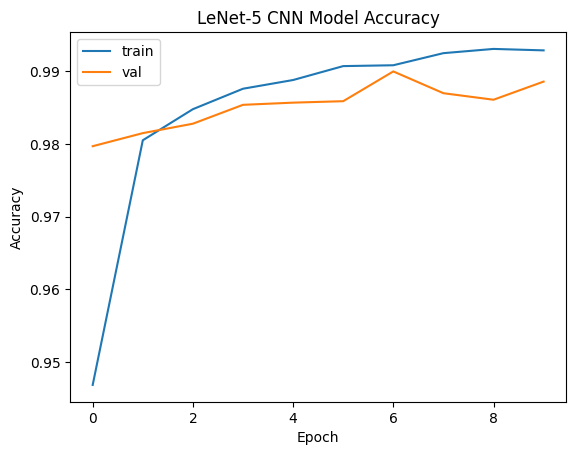

In [60]:
plt.plot(model2_history.history['accuracy'])
plt.plot(model2_history.history['val_accuracy'])
plt.title('LeNet-5 CNN Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

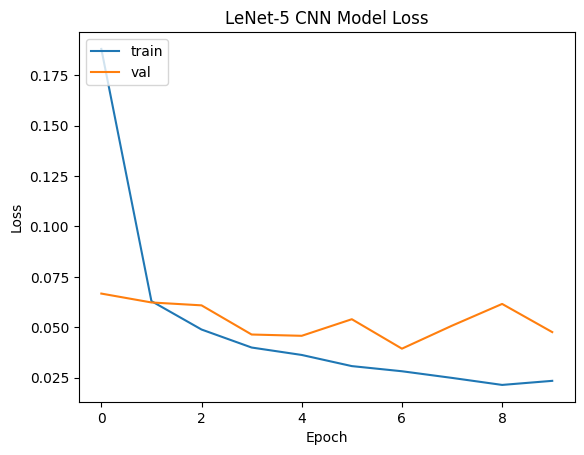

In [61]:
plt.plot(model2_history.history['loss'])
plt.plot(model2_history.history['val_loss'])
plt.title('LeNet-5 CNN Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [62]:
print('Accuracy Score =',round(np.max(model2_history.history['val_accuracy']) * 100, 2) , '%')

Accuracy Score = 99.0 %


## Confusion Matrix

In [64]:
rounded_labels = np.argmax(test_labels, axis=1)
cm2 = confusion_matrix(rounded_labels, model2_perdict)
cm2

array([[ 977,    1,    1,    0,    0,    0,    0,    1,    0,    0],
       [   0, 1127,    0,    0,    0,    2,    3,    1,    1,    1],
       [   0,    0, 1024,    0,    0,    0,    0,    8,    0,    0],
       [   0,    0,    0, 1001,    0,    4,    0,    2,    3,    0],
       [   0,    0,    3,    0,  968,    0,    0,    0,    0,   11],
       [   1,    0,    0,    5,    0,  884,    1,    1,    0,    0],
       [   5,    4,    1,    0,    4,   14,  929,    0,    1,    0],
       [   0,    3,    2,    2,    0,    0,    0, 1020,    0,    1],
       [   2,    0,    2,    0,    0,    3,    0,    1,  962,    4],
       [   0,    0,    0,    0,    5,    8,    0,    2,    0,  994]])

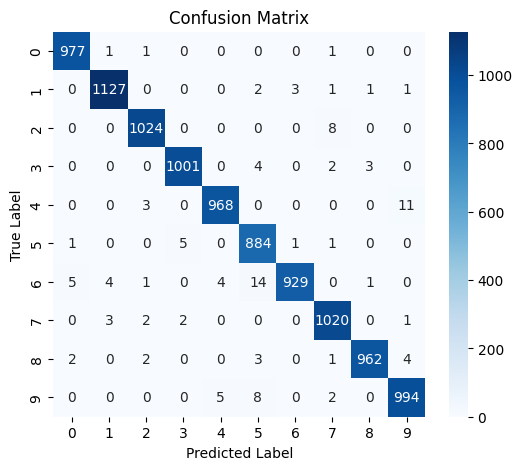

In [69]:
plt.figure(figsize=(6, 5))
sns.heatmap(cm2, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [71]:
print(classification_report(rounded_labels, model2_perdict))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.97      0.99      0.98       892
           6       1.00      0.97      0.98       958
           7       0.98      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.98      0.99      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



# Conclusion:

LeNet-5 works better with MNIST dataset